In [ ]:
#資料預處理

In [ ]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [ ]:
x_train_image.shape

In [ ]:
y_train_label.shape

In [ ]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [ ]:
#建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [11]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
#訓練模型

In [14]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [15]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 0.5046 - accuracy: 0.8678 - val_loss: 0.2464 - val_accuracy: 0.9327
Epoch 2/20
 - 1s - loss: 0.2201 - accuracy: 0.9378 - val_loss: 0.1752 - val_accuracy: 0.9520
Epoch 3/20
 - 2s - loss: 0.1593 - accuracy: 0.9551 - val_loss: 0.1483 - val_accuracy: 0.9578
Epoch 4/20
 - 2s - loss: 0.1244 - accuracy: 0.9647 - val_loss: 0.1275 - val_accuracy: 0.9622
Epoch 5/20
 - 2s - loss: 0.0998 - accuracy: 0.9720 - val_loss: 0.1134 - val_accuracy: 0.9683
Epoch 6/20
 - 2s - loss: 0.0822 - accuracy: 0.9769 - val_loss: 0.1032 - val_accuracy: 0.9693
Epoch 7/20
 - 2s - loss: 0.0685 - accuracy: 0.9809 - val_loss: 0.0957 - val_accuracy: 0.9722
Epoch 8/20
 - 2s - loss: 0.0586 - accuracy: 0.9840 - val_loss: 0.0910 - val_accuracy: 0.9729
Epoch 9/20
 - 1s - loss: 0.0509 - accuracy: 0.9863 - val_loss: 0.0872 - val_accuracy: 0.9752
Epoch 10/20
 - 1s - loss: 0.0435 - accuracy: 0.9886 - val_loss: 0.0837 - val_accuracy: 0.9750
Epoch 11/20
 - 2s -

In [ ]:
#以圖形顯示訓練過程

In [16]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

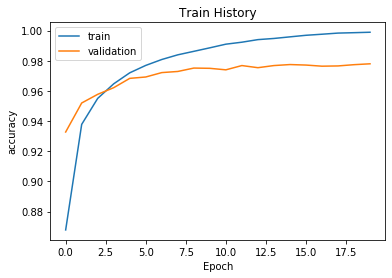

In [18]:
show_train_history(train_history,'accuracy','val_accuracy')

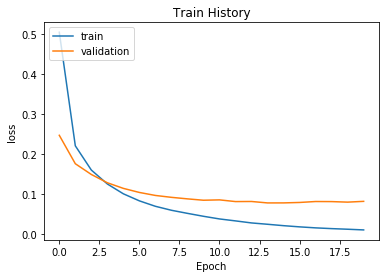

In [19]:
show_train_history(train_history,'loss','val_loss')

In [ ]:
#評估模型準確率

In [20]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 59us/step

accuracy= 0.979200005531311


In [ ]:
#進行預測

In [21]:
prediction=model.predict_classes(x_Test)

In [22]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

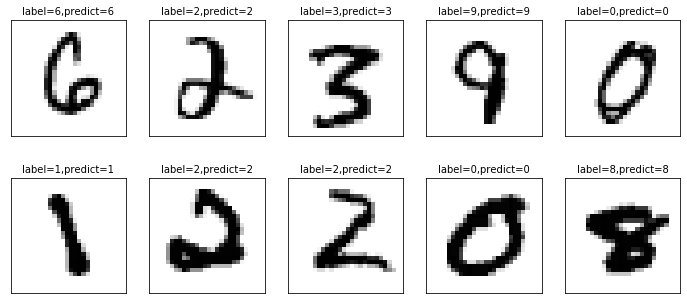

In [32]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=989)

In [ ]:
#confusion matrix

In [27]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,1,0,0,0,3,1,3,0
1,0,1127,3,0,0,1,2,1,1,0
2,4,0,1014,2,0,0,2,6,4,0
3,0,0,3,989,0,4,0,5,4,5
4,3,0,3,1,951,0,3,4,2,15
5,2,0,0,12,1,861,7,2,4,3
6,5,2,1,1,3,3,943,0,0,0
7,0,3,6,1,0,0,0,1017,0,1
8,5,1,7,9,2,2,2,9,935,2


In [28]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [29]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2597,5,3
2810,5,3
3902,5,3
4271,5,3
4360,5,3


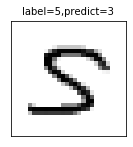

In [34]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1670,num=1)

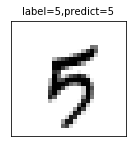

In [31]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)

In [35]:
tensorflow

NameError: name 'tensorflow' is not defined